## Ejercicios realizados sobre el Análisis Exploratorio Realizado


In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

**a. ¿Cuáles son las 10 películas que contaron con más presupuesto?**


In [23]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Sort the DataFrame by the 'budget' column in descending order
sorted_df = df.sort_values(by='budget', ascending=False)

# Select the top 10 movies with the highest budgets
top_10_budget_films = sorted_df[['originalTitle', 'budget']].head(10)

# Format the 'budget' values as currency (e.g., $1,000,000)
top_10_budget_films['budget'] = top_10_budget_films['budget'].apply(lambda x: f"${x:,.0f}")

# Display the resulting DataFrame with the 'originalTitle' and formatted 'budget' columns
print("El top 10 de las películas con mayor presupuesto es:")
display(top_10_budget_films)

El top 10 de las películas con mayor presupuesto es:


,originalTitle,budget
716,Pirates of the Caribbean: On Stranger Tides,"$380,000,000"
4710,Avengers: Age of Ultron,"$365,000,000"
5952,Avengers: Endgame,"$356,000,000"
5953,Avengers: Infinity War,"$300,000,000"
163,Pirates of the Caribbean: At World's End,"$300,000,000"
4953,Justice League,"$300,000,000"
607,Superman Returns,"$270,000,000"
3791,Tangled,"$260,000,000"
7134,The Lion King,"$260,000,000"
280,Spider-Man 3,"$258,000,000"


**Análisis de las Películas con Mayor Presupuesto**

<small> 
La tabla anterior presenta las 10 películas con los mayores presupuestos en nuestro dataset. "Pirates of the Caribbean: On Stranger Tides" lidera la lista con un presupuesto de $380 millones, seguido de cerca por "Avengers: Age of Ultron" con $365 millones y "Avengers: Endgame" con $356 millones. Estos elevados presupuestos reflejan el alto coste asociado con la producción de películas de gran escala, que a menudo incluyen extensos efectos especiales, grandes elencos y equipos técnicos, así como locaciones globales.

Este grupo de películas destaca por ser predominantemente del género de acción y aventura, lo cual es indicativo de la tendencia de la industria cinematográfica a invertir considerablemente en películas que apuntan a generar grandes taquillas a nivel mundial. La presencia repetida de franquicias como "Avengers" y "Pirates of the Caribbean" subraya la apuesta de los estudios por secuelas y series de películas que ya han demostrado ser exitosas comercialmente.
</small>


**b. ¿Cuáles son las 10 películas que más ingresos tuvieron?**


In [24]:
# Read the CSV file into a DataFrame
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'revenue' column to numeric, coercing errors to NaN
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Sort the DataFrame by the 'revenue' column in descending order and select the top 10 movies
top_revenue_films = df.sort_values(by='revenue', ascending=False)[['originalTitle', 'revenue']].head(10)

# Format the 'revenue' values as currency (e.g., $1,000,000)
top_revenue_films['revenue'] = top_revenue_films['revenue'].apply(lambda x: f"${x:,.0f}")

# Display the resulting DataFrame with the 'originalTitle' and formatted 'revenue' columns
print("El top 10 de peliculas con mayores ingresos es:")
display(top_revenue_films)

El top 10 de peliculas con mayores ingresos es:


,originalTitle,revenue
3210,Avatar,"$2,847,246,203"
5952,Avengers: Endgame,"$2,797,800,564"
307,Titanic,"$2,187,463,944"
4947,Star Wars: The Force Awakens,"$2,068,223,624"
5953,Avengers: Infinity War,"$2,046,239,637"
4914,Jurassic World,"$1,671,713,208"
7134,The Lion King,"$1,667,635,327"
9049,Spider-Man: No Way Home,"$1,631,853,496"
3397,The Avengers,"$1,518,815,515"
5087,Furious 7,"$1,515,047,671"


### Análisis de las Películas con Mayor Presupuesto

<small> La tabla anterior presenta las 10 películas con los mayores presupuestos dentro del dataset. "Pirates of the Caribbean: On Stranger Tides" lidera la lista con un impresionante presupuesto de $380 millones, seguido de cerca por "Avengers: Age of Ultron" con $365 millones y "Avengers: Endgame" con $356 millones. Estos elevados presupuestos reflejan el alto coste asociado con la producción de películas de gran escala, que a menudo incluyen extensos efectos especiales, grandes elencos y equipos técnicos, así como locaciones globales.

Este grupo de películas destaca por ser predominantemente del género de acción y aventura, lo cual es indicativo de la tendencia de la industria cinematográfica a invertir considerablemente en películas que apuntan a generar grandes taquillas a nivel mundial. La presencia repetida de franquicias como "Avengers" y "Pirates of the Caribbean" subraya la apuesta de los estudios por secuelas y series de películas que ya han demostrado ser exitosas comercialmente.
</small>


**c. ¿Cuál es la película que más votos tuvo?**


In [19]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'voteCount' column to numeric, coercing errors to NaN
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')

# Sort the DataFrame by the 'voteCount' column to find the top voted film
top_voted_film = df.loc[df['voteCount'].idxmax()]

print("La película con más votos es:")
display(df.loc[[df['voteCount'].idxmax()]][['originalTitle', 'voteCount']])

La película con más votos es:


,originalTitle,voteCount
3511,Inception,30788


**Película con Mayor Número de Votos**

<small> La película que ha recibido el mayor número de votos dentro del dataset es **Inception**, con un total de **30788** votos. Esto indica no solo una alta participación de la audiencia sino también un gran interés y compromiso del público con esta película, reflejando su popularidad y resonancia cultural. </small>


**d. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?**


In [20]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'voteCount' and 'voteAvg' columns to numeric, coercing errors to NaN
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')
df['voteAverage'] = pd.to_numeric(df['voteAvg'], errors='coerce')

# Filter out films with fewer than 500 votes
min_votes = 500
filtered_df = df[df['voteCount'] > min_votes]

# Find the movie with the lowest average rating
worst_rated_film = filtered_df.loc[filtered_df['voteAvg'].idxmin()]

print("La película con la peor calificación es:")
display(filtered_df.loc[[filtered_df['voteAvg'].idxmin()]][['originalTitle', 'voteAverage', 'voteCount']])

La película con la peor calificación es:


,originalTitle,voteAverage,voteCount
2766,Dragonball Evolution,2.8,1600


**Análisis de la Película con la Peor Calificación según los Usuarios**

<small> La película que ha recibido la calificación más baja de los usuarios dentro del dataset es **Dragonball Evolution**. Con una calificación promedio de **2.8** y **1600** votos, este título refleja una recepción significativamente negativa por parte de la audiencia. La evaluación de los usuarios sugiere que la película no logró satisfacer las expectativas en varios aspectos clave como la trama, la actuación o la producción. </small>


**e. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras**



El año con más películas fue 2021, con un total de 816 películas.


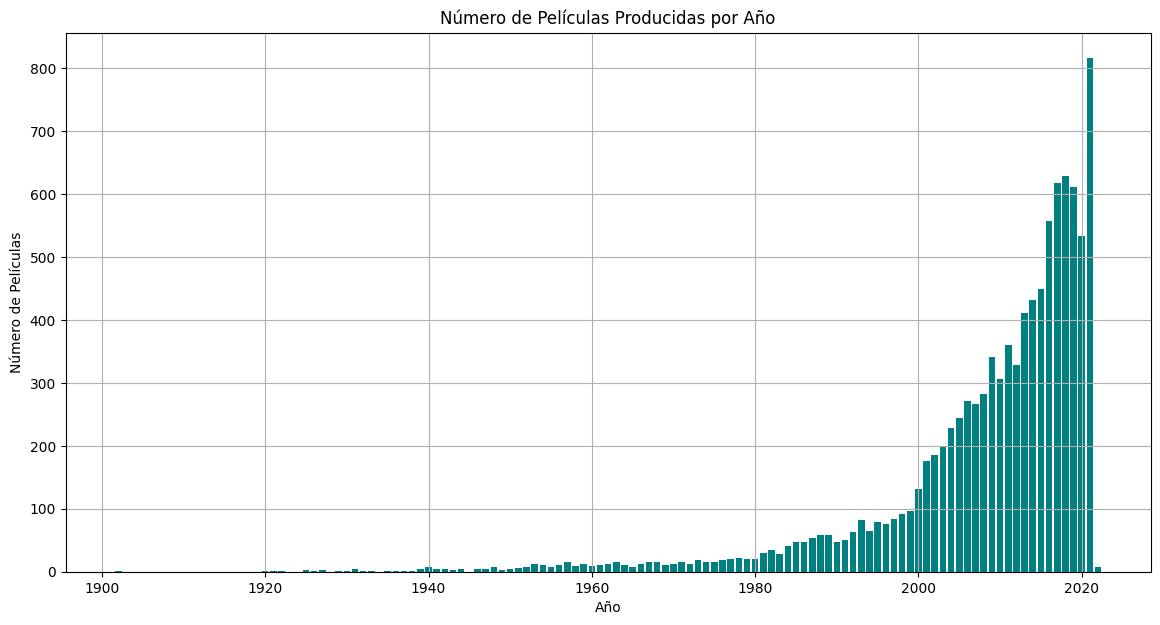

In [26]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['releaseYear'] = df['releaseDate'].dt.year

movies_per_year = df['releaseYear'].value_counts().sort_index()

max_year = movies_per_year.idxmax()
max_movies = movies_per_year.max()

print(f"\nEl año con más películas fue {max_year}, con un total de {max_movies} películas.")

plt.figure(figsize=(14, 7))
plt.bar(movies_per_year.index, movies_per_year.values, color='teal')
plt.title('Número de Películas Producidas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()

**Análisis del Año con Mayor Producción Cinematográfica**

<small> El análisis del número de películas producidas por año revela una tendencia creciente en la producción cinematográfica, alcanzando un pico en **2021** con un total de **816 películas**. Este incremento es evidente en el gráfico adjunto, que muestra cómo la producción de películas ha aumentado significativamente en las últimas décadas.

El año 2021 se destaca como el año con la producción más alta registrada dentro del dataset. Este fenómeno puede atribuirse a varios factores, incluyendo el avance tecnológico que facilita la producción de películas, una mayor demanda de contenido debido a la expansión de plataformas de streaming, y posiblemente un repunte en la producción tras los retrasos causados por eventos globales como la pandemia de COVID-19, que impactó significativamente la industria en 2020.

Esta tendencia no solo refleja el crecimiento de la industria cinematográfica sino también un cambio en los hábitos de consumo de entretenimiento a nivel mundial, con un enfoque creciente hacia la diversidad de contenido y la accesibilidad digital. Este aumento en la producción también puede estar influenciado por la globalización del cine, donde más países y productores independientes están participando activamente en la creación de películas.

El gráfico de barras proporciona una visualización clara de estas tendencias, mostrando no solo el año con más producciones sino también cómo ha evolucionado la cantidad de películas a lo largo del tiempo, subrayando los cambios significativos y los nuevos desarrollos en la industria del cine.
</small>


**f. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas?**


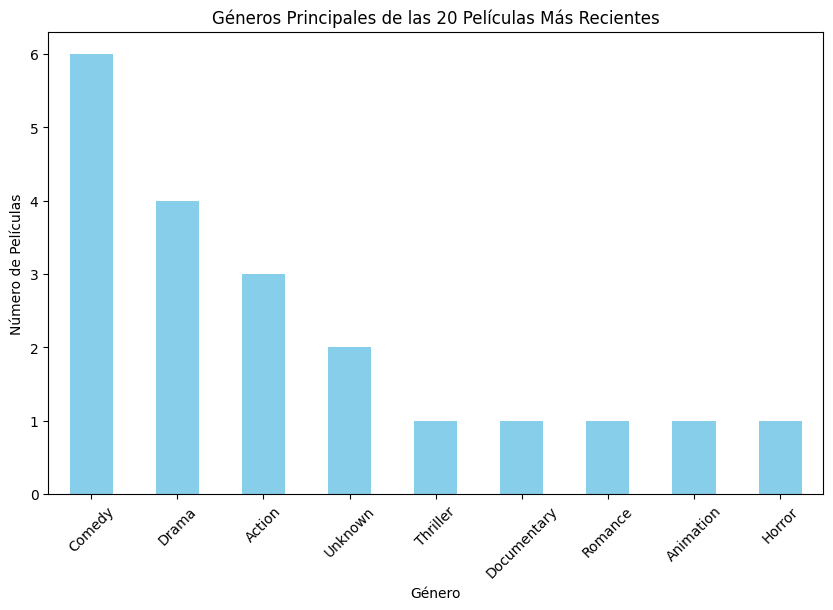

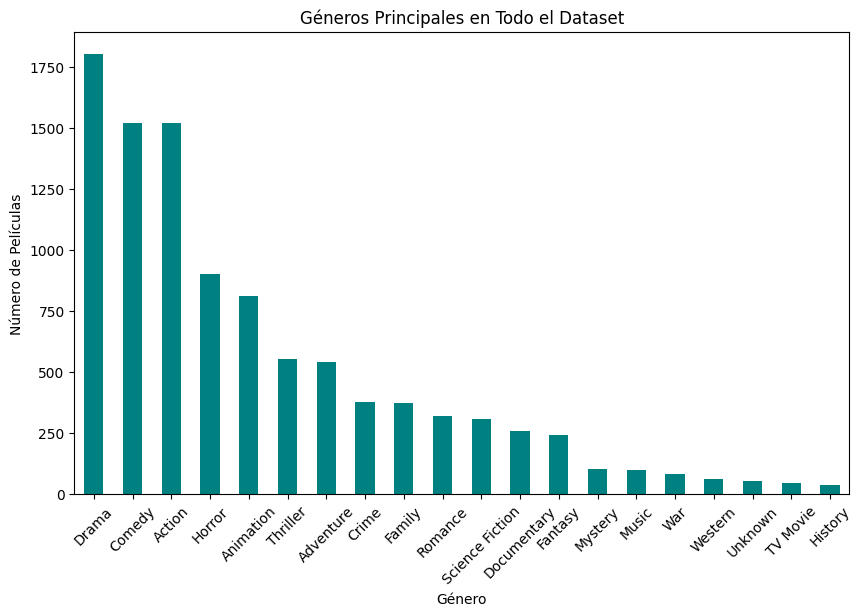

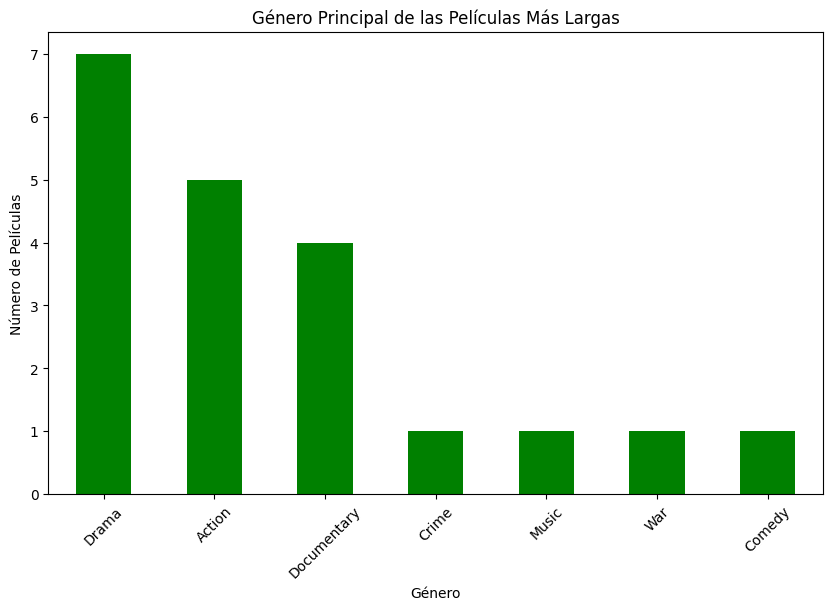

In [30]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['mainGenre'] = df['genres'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else 'Unknown')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Data for the first question: Genres of the 20 most recent films
df.sort_values(by='releaseDate', ascending=False, inplace=True)
recent_20 = df.head(20)
recent_genres_count = recent_20['mainGenre'].value_counts()

# Data for the second question: Predominant genre in the dataset
overall_genres_count = df['mainGenre'].value_counts()

# Data for the third question: Genre of the longest films
df.sort_values(by='runtime', ascending=False, inplace=True)
longest_films_genre = df.head(20)['mainGenre'].value_counts()

# Graph for the first question
plt.figure(figsize=(10, 6))
recent_genres_count.plot(kind='bar', color='skyblue')
plt.title('Géneros Principales de las 20 Películas Más Recientes')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

# Graph for the second question
plt.figure(figsize=(10, 6))
overall_genres_count.plot(kind='bar', color='teal')
plt.title('Géneros Principales en Todo el Dataset')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

# Graph for the third question
plt.figure(figsize=(10, 6))
longest_films_genre.plot(kind='bar', color='green')
plt.title('Género Principal de las Películas Más Largas')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()



**1. ¿Cuál es el género principal de las 20 películas más recientes?**

   <small>
   De las 20 películas más recientes, el género de "Comedia" es el más predominante, seguido por "Drama" y "Acción". Este predominio de la comedia podría sugerir una tendencia hacia películas con un tono más ligero y entretenido en los lanzamientos más recientes, posiblemente como respuesta a una demanda de escapismo y diversión por parte del público.
   </small>

**2. ¿Cuál es el género principal que predomina en el conjunto de datos?**

   <small>
   En el conjunto total de datos, el género "Drama" es el más predominante, seguido de cerca por "Comedia" y "Acción". Esto indica que, a lo largo de los años, las películas de drama han sido consistentemente populares, reflejando quizás su capacidad para explorar una amplia gama de temas humanos y sociales que resuenan con una amplia audiencia.
   </small>

**3. ¿A qué género principal pertenecen las películas más largas?**

   <small>
   Las películas más largas tienden a pertenecer al género de "Drama", seguido por "Acción" y "Documental". Este resultado es coherente con la naturaleza del género dramático, que a menudo se sumerge en narrativas complejas y profundas que requieren un tiempo de ejecución más extenso para desarrollarse completamente. Los documentales y las películas de acción también pueden requerir más tiempo para profundizar en sus respectivos temas o desarrollar secuencias de acción detalladas.
   </small>
